In [0]:
import pandas as pd
import numpy as np
from google.colab.files import upload
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
upload()
admission = pd.read_csv('Admission_Predict.csv')

Saving Admission_Predict.csv to Admission_Predict.csv
Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [4]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
target = admission['Chance of Admit ']
target.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [12]:
df = admission.copy()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

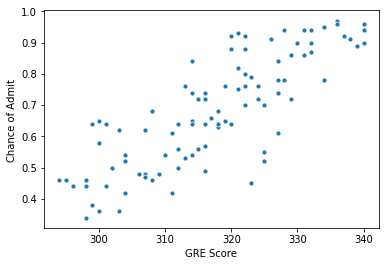

In [23]:
sns.scatterplot(df['GRE Score'][:100],df['Chance of Admit '][:100],s=25,data=df);

In [24]:
df.corr()['Chance of Admit ']

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

In [46]:
df.drop(columns='Chance of Admit ',axis=1,inplace=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [47]:
df.set_index('Serial No.',inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(df,target,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

log_clf = LinearRegression().fit(X_train,y_train)
lnr_clf = LinearRegression().fit(X_train,y_train)

In [61]:
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(log_clf.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(log_clf.score(X_valid,y_valid)))
print()
print('Accuracy of Linear regression classifier on test set: {:.3f}'.format(lnr_clf.score(X_train,y_train)))
print('Accuracy of Linear regression classifier on test set: {:.3f}'.format(lnr_clf.score(X_valid,y_valid)))

Accuracy of Logistic regression classifier on test set: 0.824
Accuracy of Logistic regression classifier on test set: 0.725

Accuracy of Linear regression classifier on test set: 0.824
Accuracy of Linear regression classifier on test set: 0.725


In [58]:
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(dt_clf.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(dt_clf.score(X_valid,y_valid)))

Accuracy of Logistic regression classifier on test set: 1.000
Accuracy of Logistic regression classifier on test set: 0.426


By default the `n_neighbors` value in KNN is 5

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn_clf = KNeighborsRegressor().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(knn_clf.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(knn_clf.score(X_valid,y_valid)))

Accuracy of Logistic regression classifier on test set: 0.818
Accuracy of Logistic regression classifier on test set: 0.599


The above putput is an example of overfitting

By default the `n_neighbors` value to 8 and we can crealy see that we have avoided overfitting to some extent

In [65]:
from sklearn.neighbors import KNeighborsRegressor

knn_clf = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(knn_clf.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(knn_clf.score(X_valid,y_valid)))

Accuracy of Logistic regression classifier on test set: 0.796
Accuracy of Logistic regression classifier on test set: 0.622


In [76]:
from sklearn.svm import SVR

svc_reg = SVR(gamma='auto').fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(svc_reg.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(svc_reg.score(X_valid,y_valid)))

Accuracy of Logistic regression classifier on test set: 0.748
Accuracy of Logistic regression classifier on test set: 0.474
